In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
np.random.seed(4)

In [272]:
class votePop:
    
    def __init__(self,n=2000,center=None,cov=None):
        self.N = n
        if center is None:
            self.center = [0,0]
        else:
            self.center = center

        if cov is None:
            self.cov = [[60000,0],[0,60000]]
        else:
            self.cov = cov

        self.voters = np.random.multivariate_normal(self.center,self.cov,self.N)
        
    def show(self, cs=None):
        x,y = self.voters.T
        plt.plot(x,y,'x', zorder=-1)
        plt.axis('equal')
        plt.axis([-1000, 1000, -1000, 1000])
        if cs is not None:
            pos = np.array([cs[k].pos for k in cs])
            pos = pos[pos[:,0].argsort()]
            cxs, cys = pos.T
            plt.scatter(cxs,cys, c=sorted(cs.keys()), zorder=1, cmap='Reds')
        plt.show()

In [217]:
class candidate:
    
    def __init__(self,pos=None, ID=None):
        if pos is None:
            self.pos = np.array([0,0])
        else:
            self.pos = np.array(pos)
        self.votes = None
        
        self.ID = ID
        if ID is None:
            self.ID = np.random.randn()
        
    def __str__(self):
        return str(self.pos) + ':' + str(self.ID)

In [218]:
def election(population, candidates, ballot=None, method=None, Threshold=None):
    if method is None:
        method = 'plurality'
    if ballot is None:
            ballot = candidates
    
    positions = np.array([candidates[k].pos for k in candidates])
    voters = population.voters
    
    #zero out votes
    for c in candidates.values():
        c.votes=0
    
    if method is 'IRV' or 'plurality': #Euclidian Voting
        for voter in voters:
            distances = np.linalg.norm(positions - voter, axis=-1) #along rows
            candidates[np.argmin(distances)].votes += 1
            
        res=[candidates[k].votes for k in candidates]
        winner = np.argmax(res)
            
        if method is 'IRV':
#             for k, v in candidates.items():
#                 print(k, v)
            if candidates[winner].votes < (population.N // 2): #not majority
                #print("pop={},c={}".format(population.N // 2,res))
                loser = np.argmin(res)
                nextRound = dict()
                i = 0;
                for k in candidates: 
                    if candidates[k].ID is not candidates[loser].ID: #left shift
                        nextRound[i] = candidates[k]
                        i += 1
                        
                winner = election(population, nextRound, ballot, method='IRV')
        
    if method is "approval" or "nond":
        assert Threshold is not None
        for voter in voters:
            distances = np.linalg.norm(positions - voter, axis=-1) #along rows
            
            
    return ballot[winner].ID

In [247]:
class electionSweep():
    def __init__(self, candidates, size=None, xres=25, yres=None , n=2000): #TODO:refactor with kwargs later
        if size is None:
            size = [[-1000,1000],[-1000,1000]]
        [[self.xmin,self.xmax],[self.ymin,self.ymax]] = size
        
        self.xres = xres
        self.yres = yres
        if yres is None:
            self.yres = self.xres
            
        
        self.N = n
        self.C = candidates
        self.Cinv = {v: k for k, v in self.C.items()} #TODO:Fix ugly
        self.ballot={candidates[k].ID:k for k in candidates}

        self.xs = np.linspace(self.xmin, self.xmax, num=self.xres)
        self.ys = np.linspace(self.ymin, self.ymax, num=self.yres)
        self.res = np.zeros((self.xres, self.yres))
        
    def run(self, style=None):
        for x in range(self.xres):
            for y in range(self.yres):
                pop = votePop(self.N,center=[self.xs[x],self.ys[y]])
                #self.res[self.xres-x-1,y] = self.ballot[election(pop, self.C, method=style)] #Array filling vs image indexing
                self.res[x,y] = self.ballot[election(pop, self.C, method=style)]
        self.res = np.fliplr(np.rot90(self.res, 3))
        
    def show(self):
        pos = np.array([self.C[k].pos for k in self.C])
        pos = pos[pos[:,0].argsort()]
        cxs, cys = pos.T
        plt.imshow(self.res, interpolation='none', origin='lower', cmap='Reds', extent=[self.xmin,self.xmax,self.ymin,self.ymax])
        plt.scatter(cxs,cys,c=sorted(self.C.keys()), cmap='Reds')
        plt.grid(False)

In [225]:
c1= {1:candidate([-100,-600], ID=1),0:candidate([-400,-0], ID=0),2:candidate([200,-50], ID=2),3:candidate([400,50], ID=3)}
a = electionSweep(c1, xres=100)

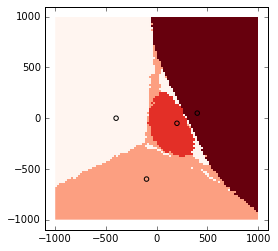

In [226]:
a.run(style='IRV')
a.show()

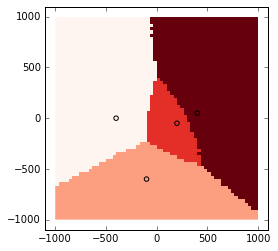

In [222]:
a.run()
a.show()

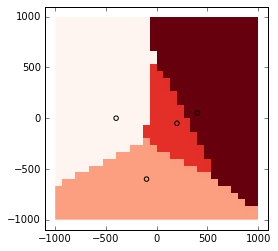

In [206]:
a.run()
a.show()

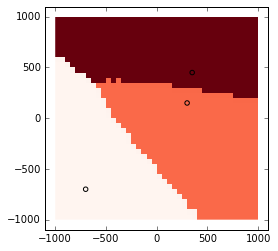

In [283]:
c1= {0:candidate([-700,-700], ID=0),1:candidate([300,150], ID=1),2:candidate([350,450], ID=2)}
a = electionSweep(c1,xres=40)
a.run()
a.show()

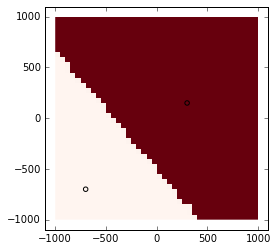

In [284]:
c1= {0:candidate([-700,-700], ID=0),1:candidate([300,150], ID=1)}
a = electionSweep(c1,xres=40)
a.run()
a.show()

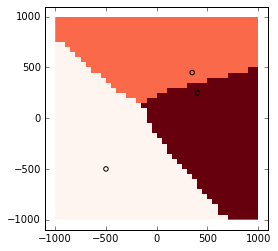

In [280]:
c1= {0:candidate([-500,-500], ID=0),2:candidate([400,250], ID=2),1:candidate([350,450], ID=1)}
a = electionSweep(c1,xres=40)
a.run()
a.show()

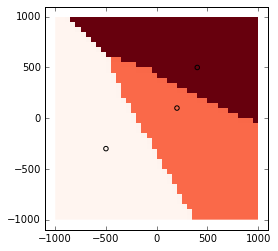

In [235]:
a.run()
a.show()

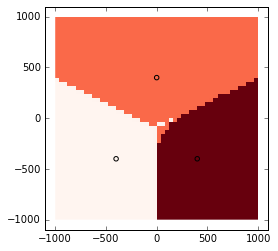

In [248]:
c1= {0:candidate([-400,-400], ID=0),1:candidate([0,400], ID=1),2:candidate([400,-400], ID=2)}
a = electionSweep(c1,xres=50)
a.run(style='IRV')
a.show()

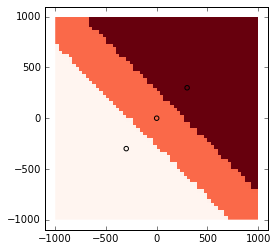

In [268]:
c1= {0:candidate([-300,-300], ID=0),1:candidate([0,0], ID=1),2:candidate([300,300], ID=2)}
a = electionSweep(c1,xres=60)
a.run()
a.show()

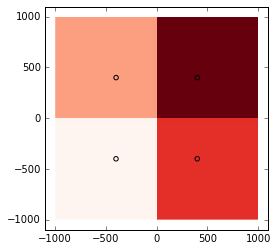

In [239]:
c1= {0:candidate([-401,-400], ID=0),1:candidate([-400,400], ID=1),2:candidate([400,-400], ID=2), 3:candidate([401,400], ID=3)}
a = electionSweep(c1,xres=40)
a.run()
a.show()

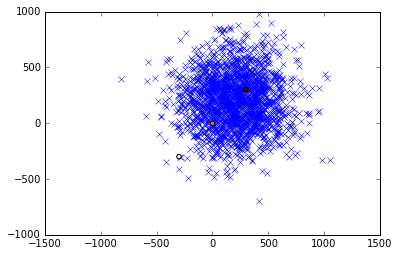

In [273]:
c1= {0:candidate([-300,-300], ID=0),1:candidate([0,0], ID=1),2:candidate([300,300], ID=2)}
pop = votePop(n=2000,center=[200,200])
pop.show(cs=c1)

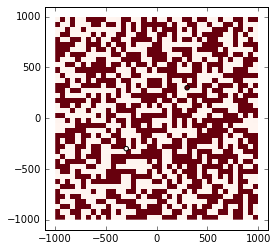

In [290]:
res=np.random.choice([0, 1], size=(40,40), p=[1./2, 1/2])
plt.imshow(res, interpolation='none', origin='lower', cmap='Reds', extent=[-1000,1000,-1000,1000])
plt.scatter([-300,300],[-300,300], c=[1,2], cmap='Reds')
plt.grid(False)

array([[1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 1]])